# Atmospheric models

The DRIFT-PHOENIX model spectra are added to the database. The grid is then interpolated and a spectrum for a given set of parameter values and spectral resolution is computed. The spectrum is then plotted together with several filter profiles.

## Getting started

In [1]:
import species
from IPython.display import Image

In [2]:
species.SpeciesInit()

Initiating species v0.2.0... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials


## Adding model spectra to the database

In [3]:
database = species.Database()

In [4]:
database.add_model(model='drift-phoenix',
                   wavel_range=None,
                   spec_res=None,
                   teff_range=None)

Unpacking DRIFT-PHOENIX model spectra... [DONE]
Adding DRIFT-PHOENIX model spectra... [DONE]                     


## Interpolating the model grid

In [5]:
read_model = species.ReadModel(model='drift-phoenix',
                               wavel_range=(1., 5.))

In [6]:
read_model.get_bounds()

{'teff': (1000.0, 3000.0), 'logg': (3.0, 5.5), 'feh': (-0.6, 0.3)}

In [7]:
model_param = {'teff':1510., 'logg':4.1, 'feh':0.1}

In [8]:
modelbox = read_model.get_model(model_param=model_param,
                                spec_res=200.)

In [9]:
filters = ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

In [10]:
species.plot_spectrum(boxes=[modelbox, ],
                      filters=filters,
                      offset=(-0.08, -0.06),
                      xlim=(1., 5.),
                      ylim=(0., 1.1e5),
                      legend='upper right',
                      output='model_spectrum.png')

Plotting spectrum: model_spectrum.png... [DONE]


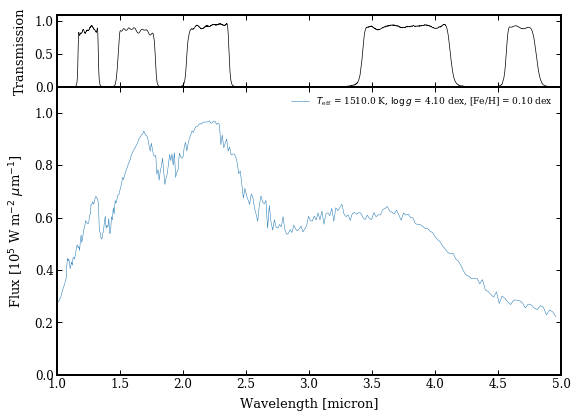

In [11]:
Image('model_spectrum.png') 

## Extracting a spectrum at a grid point

It is also possible to extract a spectrum without interpolating at one of the grid points. Let's first check what parameter values are available for the DRIFT-PHOENIX models.

In [12]:
read_model.get_points()

{'teff': array([1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
        1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600., 2700.,
        2800., 2900., 3000.]),
 'logg': array([3. , 3.5, 4. , 4.5, 5. , 5.5]),
 'feh': array([-0.6, -0.3, -0. ,  0.3])}

The `get_data` function is used for extracting an spectrum from the discrete parameter grid.

In [13]:
model_param = {'teff':1500., 'logg':4., 'feh':0., 'radius':1., 'distance':20.}

In [14]:
read_model = species.ReadModel(model='drift-phoenix',
                               wavel_range=(1., 5.))

In [15]:
modelbox = read_model.get_data(model_param)

In [16]:
species.plot_spectrum(boxes=[modelbox, ],
                      filters=filters,
                      offset=(-0.08, -0.06),
                      xlim=(1., 5.),
                      ylim=(0., 1.35e-15),
                      legend='upper right',
                      output='model_spectrum.png')

Plotting spectrum: model_spectrum.png... [DONE]


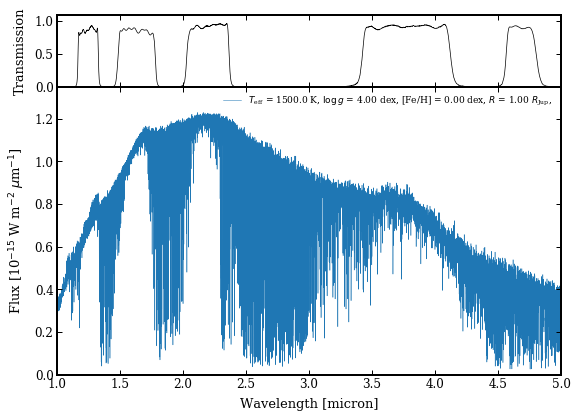

In [17]:
Image('model_spectrum.png')

## Calculating synthetic photometry

In [18]:
read_model = species.ReadModel(model='drift-phoenix',
                               filter_name='Paranal/NACO.Mp')

In [19]:
flux = read_model.get_flux(model_param)
print(f'Flux density [W m-2 micron-1] = {flux[0]:.2e}')

Flux density [W m-2 micron-1] = 3.43e-16


In [20]:
app_mag, abs_mag = read_model.get_magnitude(model_param)
print(f'Apparent magnitude [mag] = {app_mag:.2f}')
print(f'Absolute magnitude [mag] = {abs_mag:.2f}')

Apparent magnitude [mag] = 12.00
Absolute magnitude [mag] = 10.50
